In [85]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [86]:
mm_to_in = 0.03937008
in_to_mm = 1.0 / mm_to_in
mph_to_mps = 0.44704
in_to_m = 0.0254
ft_lbs_to_Nm = 1.0 / 1.355818
oz_in_to_ft_lbs = 1.0 / 192.00000012288
oz_in_to_Nm = 1.0 / 141.61193227806

In [87]:
from Tire import Tire
    
tire = Tire()
tire.calc_values()
tire.print()

TireParams: Diameter:  0.099  m
TireParams: Radius:  0.0495  m
TireParams: Radius:  0.0495  m
TireParams: Tread Depth:  0.011000000000000003  m
TireParams: Length:  0.042  m
TireParams: Surface Area:  0.013062742253626362  m^2
TireParams: Contact Patch:  4.620000000000002e-05  m^2
TireParams: Max Temp:  54.4  C
TireParams: Mass:  70.24852500839064  g
TireParams: Specific Heat Coeff:  1.88  J/(g * deg C)
TireParams: Specific Heat Mass:  132.0672270157744  J/(deg C)


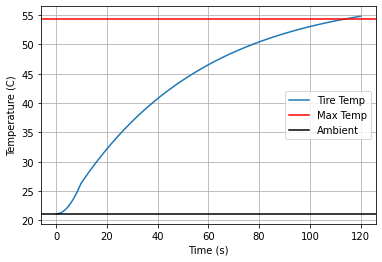

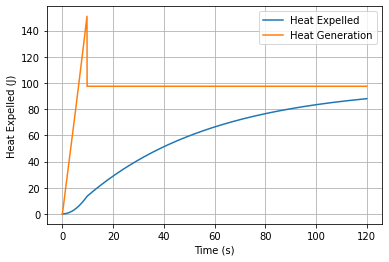

In [88]:
times = []
temps = []
dt = 0.01
time = 0.0
air_temp = 21.11
ground_temp = 31.11
temp_prior = air_temp
P_generateds = []
P_expelleds = []
forces = np.array([48.0, 0, 9.81 * 8.0])
speed = 0.0
speeds = []
for t in range(12000):
    times.append(time)
    temps.append(temp_prior)
    time += dt
    down_force = 0.001 * speed**2
    forces[2] = 8.0 * 9.81 + down_force
    P_generated = tire.calc_heat_generated(forces, speed)
    P_expelled = tire.calc_heat_expelled(temp_prior, air_temp, ground_temp)
    P_generateds.append(P_generated)
    temp_prior = tire.calc_temp_change(P_generated - P_expelled, temp_prior, dt)
    P_expelleds.append(P_expelled)
    speeds.append(speed)
    
    if speed < 130.0 * mph_to_mps:
        speed += forces[0]/8.0 * dt
    else:
        forces[0] = 2.0 # still have to fight the wind
    
plt.plot(times, temps, label='Tire Temp')
plt.axhline(y = tire.max_temp, color = 'r', linestyle = '-', label='Max Temp')
plt.axhline(y = air_temp, color = 'k', linestyle = '-', label='Ambient')
plt.ylabel('Temperature (C)')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()
plt.show()


plt.plot(times, P_expelleds, label='Heat Expelled')
plt.plot(times, P_generateds, label='Heat Generation')
plt.ylabel('Heat Expelled (J)')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()